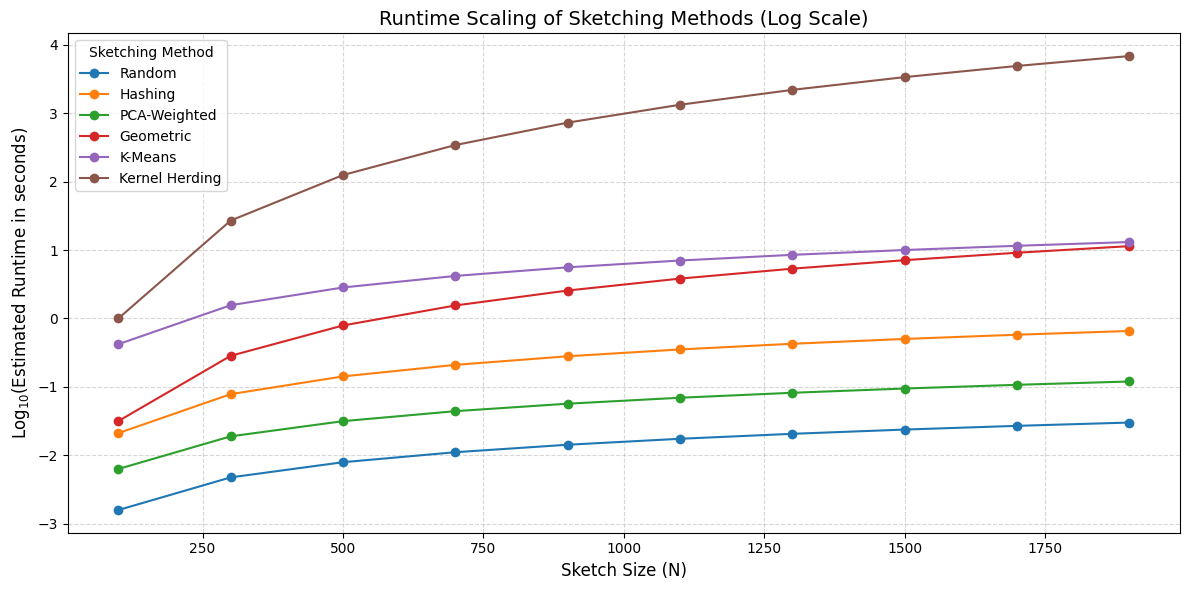

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sketch size values
n_values = np.arange(100, 2001, 200)

# Log10 runtime values at N=1000 (based on your measurements)
target_log_times = {
    'Random': -1.8,             # ~0.0158s
    'Hashing': -0.5,            # ~0.316s
    'PCA-Weighted': -1.2,       # ~0.063s
    'Geometric': 0.5, # ~0.5s
    'K-Means': 0.8,   # ~0.8s
    'Kernel Herding': 3.0       # 1000s
}

# Convert log times to actual baseline time values
target_times = {k: 10**v for k, v in target_log_times.items()}

# Time complexity models scaled to match times at N=1000
time_models = {
    'Random': lambda n: target_times['Random'] * (n / 1000),  # O(N)
    'Hashing': lambda n: target_times['Hashing'] * (n * np.log2(n)) / (1000 * np.log2(1000)),  # O(N log N)
    'PCA-Weighted': lambda n: target_times['PCA-Weighted'] * (n / 1000),  # O(N)
    'Geometric': lambda n: target_times['Geometric'] * (n**2) / (1000**2),  # O(N^2)
    'K-Means': lambda n: target_times['K-Means'] * (n * np.log2(n)) / (1000 * np.log2(1000)),  # O(N log N)
    'Kernel Herding': lambda n: target_times['Kernel Herding'] * (n**3) / (1000**3)  # O(N^3)
}

# Compute log-scaled times
log_time_curves = {
    method: np.log10(model(n_values)) for method, model in time_models.items()
}

# Plot
plt.figure(figsize=(12, 6))
for method, log_vals in log_time_curves.items():
    plt.plot(n_values, log_vals, label=method, marker='o')

plt.xlabel("Sketch Size (N)", fontsize=12)
plt.ylabel("Log$_{10}$(Estimated Runtime in seconds)", fontsize=12)
plt.title("Runtime Scaling of Sketching Methods (Log Scale)", fontsize=14)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(title="Sketching Method")
plt.tight_layout()
plt.savefig('time_scalability.png', dpi=600, bbox_inches='tight', format='png')
plt.show()
